In [5]:
## import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class NN(nn.Module):
    def __init__(self, input_size=4, hidden_layer1=32, hidden_layer2=16, num_classes=3):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [9]:
## seed to reproduce results
torch.manual_seed(42)
model = NN()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris_url = pd.read_csv(url)

In [11]:
iris_url.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
## change string column to integers
iris_url['variety'] = iris_url['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})
iris_url

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
## features as X, labels as y
X = iris_url.drop('variety', axis=1).values
y = iris_url['variety'].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [20]:
## split X & y in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
## convert features and labels into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
## loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
model.parameters

<bound method Module.parameters of NN(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>

In [28]:
## train NN model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.05763678252696991
Epoch: 1 Loss: 0.057574059814214706
Epoch: 2 Loss: 0.05751510336995125
Epoch: 3 Loss: 0.05745266377925873
Epoch: 4 Loss: 0.05740082636475563
Epoch: 5 Loss: 0.057347241789102554
Epoch: 6 Loss: 0.05731422081589699
Epoch: 7 Loss: 0.0572781004011631
Epoch: 8 Loss: 0.05727485939860344
Epoch: 9 Loss: 0.057253070175647736
Epoch: 10 Loss: 0.057266928255558014
Epoch: 11 Loss: 0.05721280723810196
Epoch: 12 Loss: 0.057166632264852524
Epoch: 13 Loss: 0.05700409784913063
Epoch: 14 Loss: 0.05683159455657005
Epoch: 15 Loss: 0.05661242455244064
Epoch: 16 Loss: 0.056433018296957016
Epoch: 17 Loss: 0.05630600452423096
Epoch: 18 Loss: 0.05623779073357582
Epoch: 19 Loss: 0.05621353164315224
Epoch: 20 Loss: 0.05621207132935524
Epoch: 21 Loss: 0.056226152926683426
Epoch: 22 Loss: 0.05622481927275658
Epoch: 23 Loss: 0.05623214319348335
Epoch: 24 Loss: 0.05618846416473389
Epoch: 25 Loss: 0.0561462864279747
Epoch: 26 Loss: 0.05603331699967384
Epoch: 27 Loss: 0.055918730795383

Text(0.5, 0, 'Epoch')

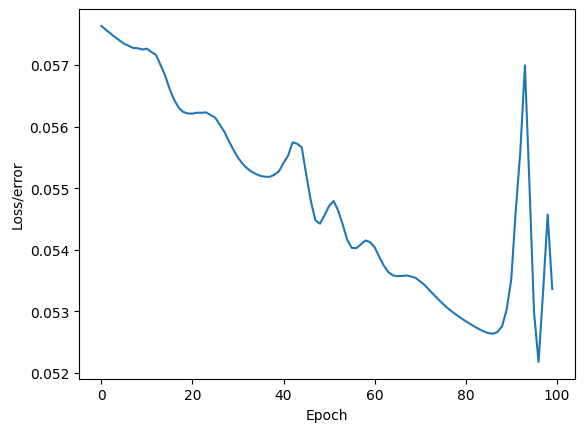

In [29]:
## plot loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [30]:
## evaluate model on test data
with torch.no_grad():   ##turn off back-propagation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
print(loss)

tensor(0.0347)


In [31]:
## check correct predictions on test data
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(data):25} {y_val.argmax().item()}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([6.1000, 2.8000, 4.7000, 1.2000]) 1
 2. tensor([5.7000, 3.8000, 1.7000, 0.3000]) 0
 3. tensor([7.7000, 2.6000, 6.9000, 2.3000]) 2
 4. tensor([6.0000, 2.9000, 4.5000, 1.5000]) 1
 5. tensor([6.8000, 2.8000, 4.8000, 1.4000]) 1
 6. tensor([5.4000, 3.4000, 1.5000, 0.4000]) 0
 7. tensor([5.6000, 2.9000, 3.6000, 1.3000]) 1
 8. tensor([6.9000, 3.1000, 5.1000, 2.3000]) 2
 9. tensor([6.2000, 2.2000, 4.5000, 1.5000]) 1
10. tensor([5.8000, 2.7000, 3.9000, 1.2000]) 1
11. tensor([6.5000, 3.2000, 5.1000, 2.0000]) 2
12. tensor([4.8000, 3.0000, 1.4000, 0.1000]) 0
13. tensor([5.5000, 3.5000, 1.3000, 0.2000]) 0
14. tensor([4.9000, 3.1000, 1.5000, 0.1000]) 0
15. tensor([5.1000, 3.8000, 1.5000, 0.3000]) 0
16. tensor([6.3000, 3.3000, 4.7000, 1.6000]) 1
17. tensor([6.5000, 3.0000, 5.8000, 2.2000]) 2
18. tensor([5.6000, 2.5000, 3.9000, 1.1000]) 1
19. tensor([5.7000, 2.8000, 4.5000, 1.3000]) 1
20. tensor([6.4000, 2.8000, 5.6000, 2.2000]) 2
21. tensor([4.7000, 3.2000, 1.6000, 0.2000]) 0
22. tensor([6

In [32]:
## test any value
test_data = torch.tensor([5.1, 3.5, 1.4, 0.2])
with torch.no_grad():
    print(model(test_data))

tensor([ 22.7490,  12.7175, -25.8818])


In [33]:
## test which class it belongs to
with torch.no_grad():
    print(model(test_data).argmax().item())

0


In [34]:
## save this NN model
torch.save(model.state_dict(), 'iris_model.pt')

In [35]:
## load saved NN model for Iris dataset
new_model = NN()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [36]:
## confirmation it loads successfully
new_model.eval()

NN(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)